In [1]:
from qiskit import IBMQ
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import execute
from qiskit import Aer
from qiskit.tools.jupyter import *
#from qiskit.providers.ibmq import least_busy
# import basic plot tools
from qiskit.tools.visualization import plot_histogram, circuit_drawer
import numpy as np

In [2]:
provider0 = IBMQ.load_account()
provider1 = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backends = provider0.backends()
backend = provider0.get_backend('ibmq_16_melbourne')

print("The backend is " + backend.name())

The backend is ibmq_16_melbourne


In [3]:
simulator = Aer.get_backend('qasm_simulator')
pi = np.pi

In [4]:
q = QuantumRegister(6)
c = ClassicalRegister(6)
qc = QuantumCircuit(q, c)

qc.h(q[0])
qc.h(q[1])
qc.h(q[2])


qc.x(q[5])

# a^x mod N

qc.cswap(q[2],q[3],q[4])
qc.cswap(q[2],q[4],q[5])

qc.cswap(q[1],q[3],q[4])
qc.cswap(q[1],q[4],q[5])
qc.cswap(q[1],q[3],q[4])
qc.cswap(q[1],q[4],q[5])

qc.cswap(q[0],q[3],q[4])
qc.cswap(q[0],q[4],q[5])
qc.cswap(q[0],q[3],q[4])
qc.cswap(q[0],q[4],q[5])
qc.cswap(q[0],q[3],q[4])
qc.cswap(q[0],q[4],q[5])
qc.cswap(q[0],q[3],q[4])
qc.cswap(q[0],q[4],q[5])

#qc.measure(q[3], c[3])
#qc.measure(q[4], c[4])
#qc.measure(q[5], c[5])


#QFT

qc.h(q[0])

qc.cu1(pi/2,q[1] ,q[0])
qc.h(q[1])

qc.cu1(pi/4,q[2] ,q[0])
qc.cu1(pi/2,q[2] ,q[1])
qc.h(q[2])

qc.swap(q[0],q[2])


qc.measure(q[0], c[0])
qc.measure(q[1], c[1])
qc.measure(q[2], c[2])

# IBMQ16

In [5]:
job_exp = execute(qc, backend=backend, shots=8192)
counts = job_exp.result().get_counts(qc)

In [6]:
print(counts)

{'000001': 941, '000101': 709, '000111': 800, '000010': 1396, '000011': 933, '000110': 1091, '000100': 962, '000000': 1360}


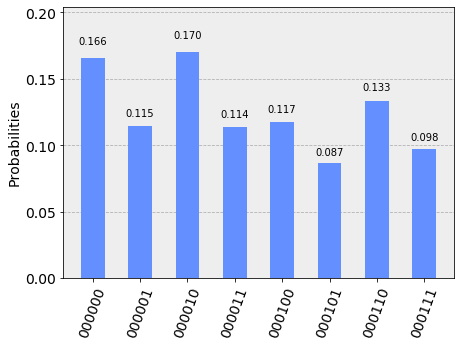

In [7]:
plot_histogram(counts)

# Simulator

In [8]:
job_sim = execute(qc, backend=simulator, shots=8192)
counts_sim = job_sim.result().get_counts(qc)

In [9]:
print("\nTotal count for simulator:",counts_sim)


Total count for simulator: {'000001': 264, '000101': 1979, '000111': 127, '000010': 498, '000011': 527, '000110': 1857, '000100': 131, '000000': 2809}


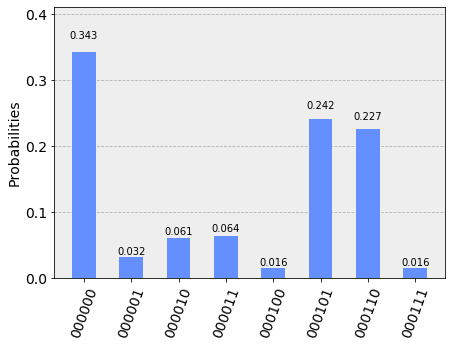

In [10]:
plot_histogram(counts_sim)

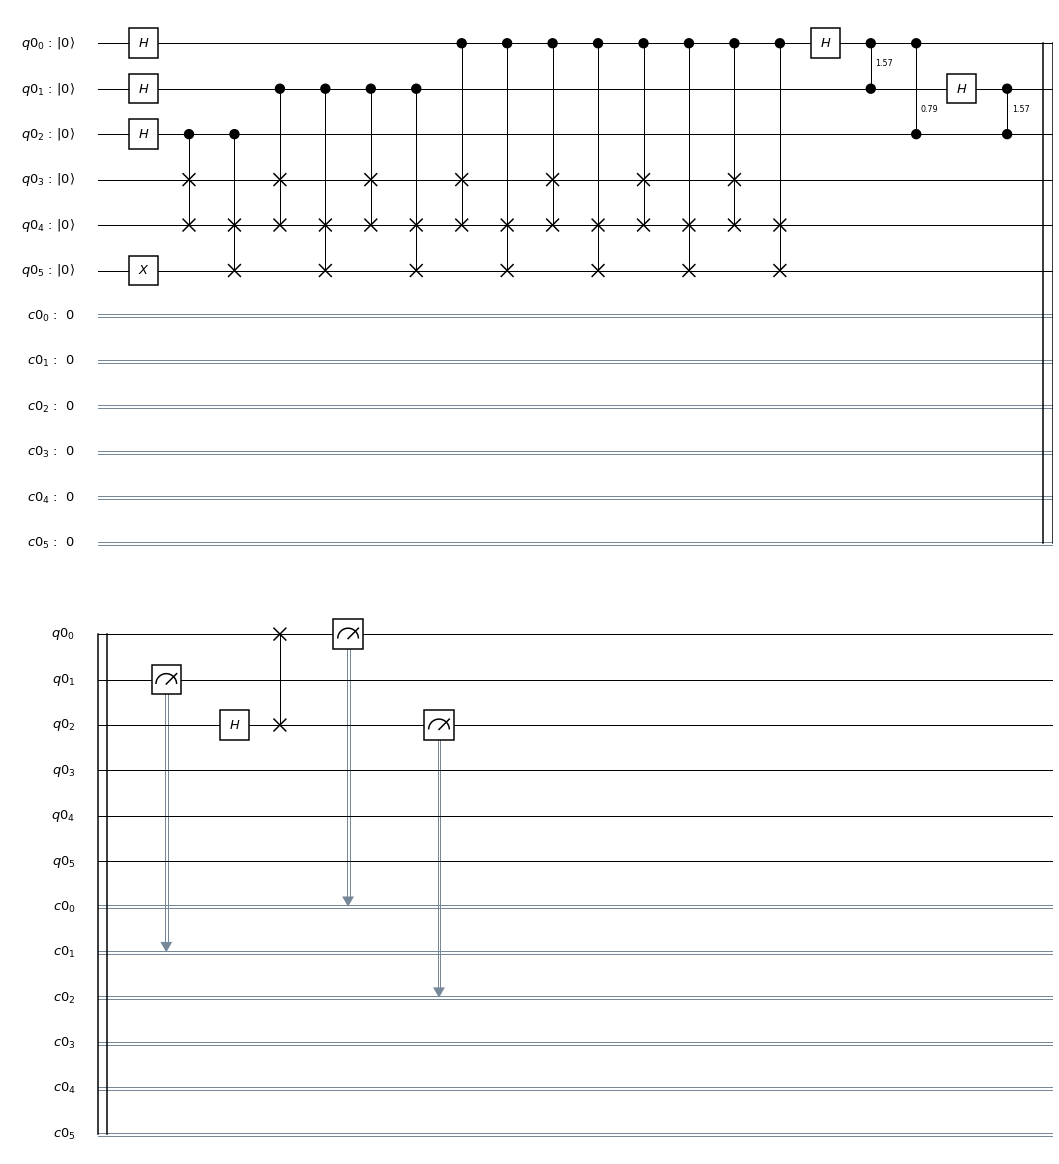

In [11]:
qc.draw(output='mpl')